In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio

# 1-数据可视化

## data1

In [2]:
mat = sio.loadmat('data/ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
data1 = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [4]:
sns.set(context='notebook',style='white')

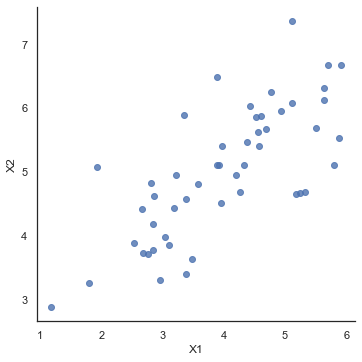

In [5]:
sns.lmplot(x = 'X1',y = 'X2',data=data1,fit_reg=False) # fit_reg = False：移去回归线
plt.show()

## data2

In [6]:
mat = sio.loadmat('data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


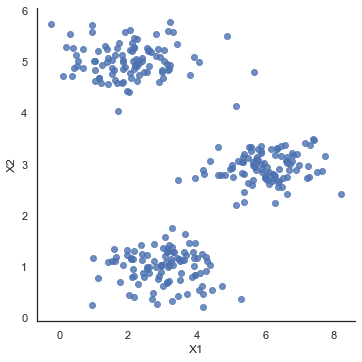

In [7]:
sns.lmplot(x = 'X1',y = 'X2',data=data2,fit_reg=False)
plt.show()

# 2-2维kmeans

## random init

+ [python中numpy.apply_along_axis()函数的用法](https://blog.csdn.net/starmoth/article/details/83832458)
+ [np.linalg.norm(求范数)](https://blog.csdn.net/hqh131360239/article/details/79061535)

In [8]:
def combine_data_C(data,C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

# k-means fn --------------------------------
def random_init(data,k):
    return data.sample(k).values

def _find_your_cluster(x,centroids):
    distances = np.apply_along_axis(func1d=np.linalg.norm,axis=1,arr=centroids - x)
    return np.argmin(distances)

def assign_cluster(data,centroids):
    return np.apply_along_axis(lambda x:_find_your_cluster(x,centroids),
                               axis = 1,
                               arr = data.values)
def new_centroids(data,C):
    data_with_c = combine_data_C(data,C)
    return data_with_c.groupby('C',as_index=False).mean().sort_values(by='C').drop('C',axis=1).values

def cost(data,centroids,C):
    m = data.shape[0]
    
    expand_C_with_centroids = centroids[C]
    distances = np.apply_along_axis(func1d=np.linalg.norm,axis=1,arr=data.values-expand_C_with_centroids)
    return distances.sum()/m

def _k_means_iter(data,k,epoch=100,tol=0.0001):
    centroids = random_init(data,k)
    cost_progress = []
    for i in range(epoch):
        print('running epoch {}'.format(i))
        
        C = assign_cluster(data,centroids)
        centroids = new_centroids(data,C)
        cost_progress.append(cost(data,centroids,C))
        
        if len(cost_progress) > 1:
            if(np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break
    return C,centroids,cost_progress[-1]

def k_means(data,k,epoch=100,n_init=10):
    tries = np.array([_k_means_iter(data,k,epoch) for _ in range(n_init)])
    least_cost_idx = np.argmin(tries[:,-1])
    return tries[least_cost_idx]

In [9]:
random_init(data2, 3)

array([[1.8173328 , 5.13333907],
       [2.15460139, 5.46282959],
       [1.12036737, 5.20880747]])

## cluster assignment

In [10]:
init_centroids = random_init(data2,3)
init_centroids

array([[2.79995882, 5.11526323],
       [2.37198785, 1.42789607],
       [5.31712478, 2.81741356]])

In [11]:
x = np.array([1,1])

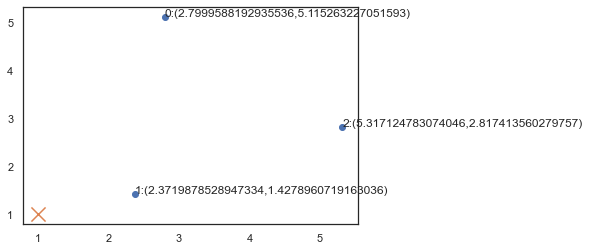

In [12]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:,0],y=init_centroids[:,1])

for i,node in enumerate(init_centroids):
    ax.annotate('{}:({},{})'.format(i,node[0],node[1]),node)
ax.scatter(x[0],x[1],marker='x',s=200)
plt.show()

In [13]:
_find_your_cluster(x,init_centroids)

1

In [14]:
C = assign_cluster(data2,init_centroids)
data_with_c = combine_data_C(data2,C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,2
2,6.352579,3.290854,2
3,2.904017,4.612204,0
4,3.231979,4.939894,0


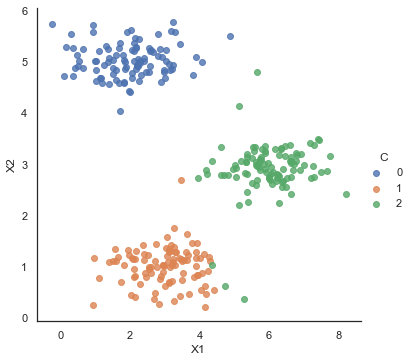

In [15]:
sns.lmplot(x = 'X1', y = 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

## calculate new centroid

In [16]:
new_centroids(data2, C)

array([[1.98363152, 5.03043004],
       [2.98065309, 1.00850302],
       [5.98863253, 2.90567348]])

In [17]:
final_C, final_centroid, _= _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2


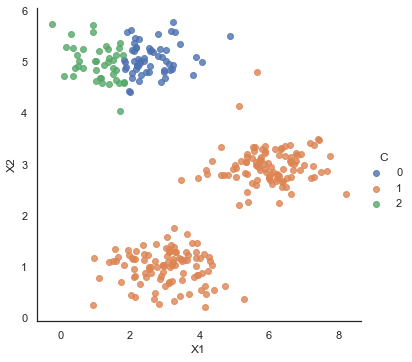

In [18]:
sns.lmplot(x = 'X1', y = 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

In [19]:
cost(data2, final_centroid, final_C)

1.4599660773083554

## k-mean with multiple tries of randome init, pick the best one with least cost

In [20]:
best_C, best_centroids, least_cost = k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2


/home/mikasalee/anaconda3/envs/CourseraMLAndrewNgmyNoteEnv/lib/python3.6/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [21]:
least_cost

0.794176363371587

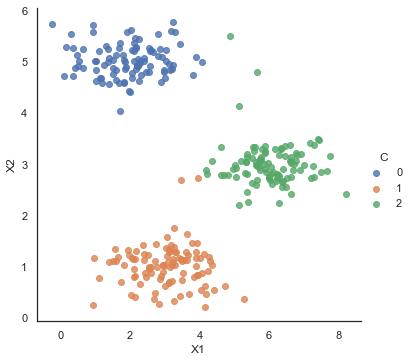

In [22]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot(x = 'X1', y = 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

## try sklearn kmeans

In [23]:
from sklearn.cluster import  KMeans

In [24]:
sk_kmeans = KMeans(n_clusters=3)

In [25]:
sk_kmeans.fit(data2)

KMeans(n_clusters=3)

In [26]:
sk_C = sk_kmeans.predict(data2)

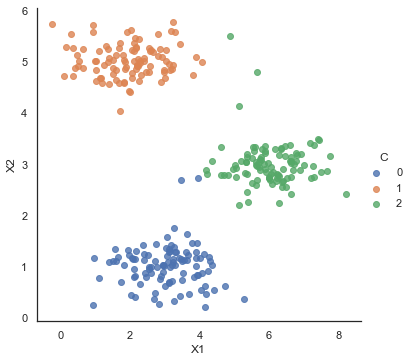

In [27]:
data_with_c = combine_data_C(data2, sk_C)
sns.lmplot(x = 'X1', y = 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# 3-kmeans用于图像压缩

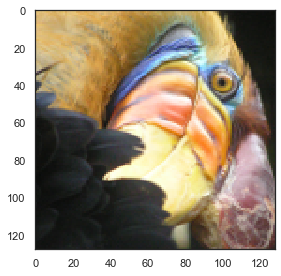

In [28]:
from skimage import io
pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)

In [29]:
pic.shape

(128, 128, 3)

In [30]:
data = pic.reshape(-1,3)

In [31]:
C, centroids, cost = k_means(pd.DataFrame(data), 16, epoch = 10, n_init=3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 9
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 9
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 9


/home/mikasalee/anaconda3/envs/CourseraMLAndrewNgmyNoteEnv/lib/python3.6/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [32]:
# 用 sklearn KMeans 来拟合
model = KMeans(n_clusters=16, n_init=100)

In [33]:
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [34]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [35]:
centroids[C].shape

(16384, 3)

In [36]:
compressed_pic = centroids[C].reshape((128,128,3))

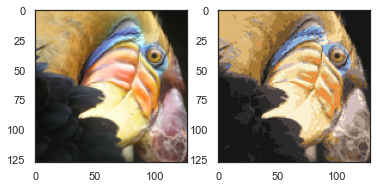

In [37]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

# 4-二维的PCA

## load data

In [38]:
def get_X(df):    
    ones = pd.DataFrame({'ones':np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    return data.iloc[:,:-1].values

def get_y(df):
    '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [39]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')

# visualize raw data
print(X.shape)

(50, 2)


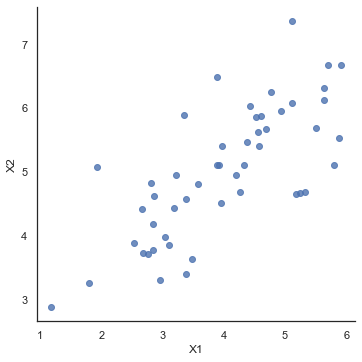

In [40]:
sns.lmplot(x = 'X1', y = 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)
plt.show()

## normalize data

In [41]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

def covariance_matrix(X):
    m = X.shape[0]
    return (X.T.dot(X))/m

def normalize(X):
    X_copy = X.copy()
    m,n = X_copy.shape
    
    for col in range(n):
        X_copy[:,col] = (X_copy[:,col] - X_copy[:,col].mean()) / X_copy[:,col].std()
    return X_copy

def pca(X):
    X_norm = normalize(X)
    Sigma = covariance_matrix(X_norm)
    
    U,S,V = np.linalg.svd(Sigma)
    
    return U,S,V
def project_data(X,U,k):
    m,n = X.shape
    
    if k > n:
        raise ValueError('k should be lower dimension of n')
    return X.dot(U[:,:k])
def recover_data(Z,U):
    m,n = Z.shape
    
    if n>=U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
    return Z.dot(U[:,:n].T)

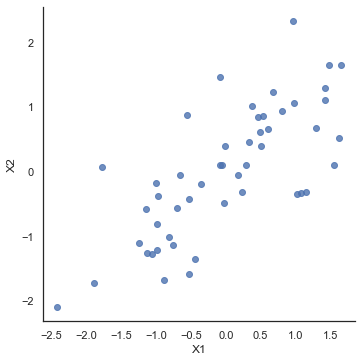

In [42]:
X_norm = normalize(X)

sns.lmplot(x = 'X1', y = 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False)
plt.show()

## covariance matrix $\Sigma$

In [43]:
Sigma =covariance_matrix(X_norm)  # capital greek Sigma
Sigma  # (n, n)

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

## PCA

In [44]:
U, S, V = pca(X_norm)

In [45]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [46]:
u1 = U[0]
u1

array([-0.70710678, -0.70710678])

## project data to lower dimension

In [47]:
# show top 10 projected data
Z = project_data(X_norm, U, 1)
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

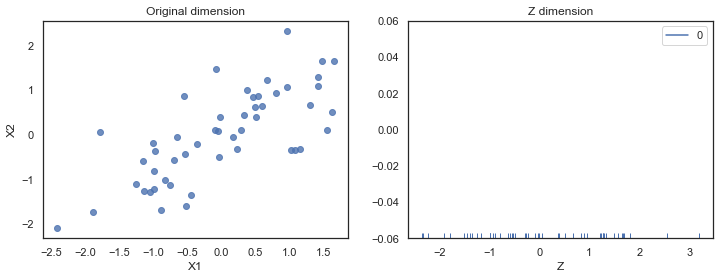

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.regplot(x = 'X1', y = 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

sns.rugplot(data=Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')
plt.show()

## recover data to original dimension

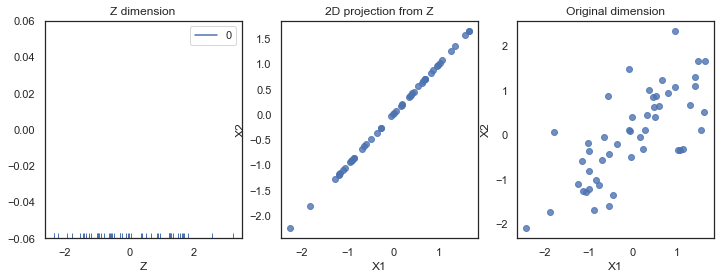

In [49]:
X_recover = recover_data(Z, U)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

sns.rugplot(data=Z, ax=ax1)
ax1.set_title('Z dimension')
ax1.set_xlabel('Z')

sns.regplot(x = 'X1', y = 'X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax2)
ax2.set_title("2D projection from Z")

sns.regplot(x = 'X1', y = 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax3)
ax3.set_title('Original dimension')
plt.show()

# 5-PCA用于面部数据

In [50]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [51]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

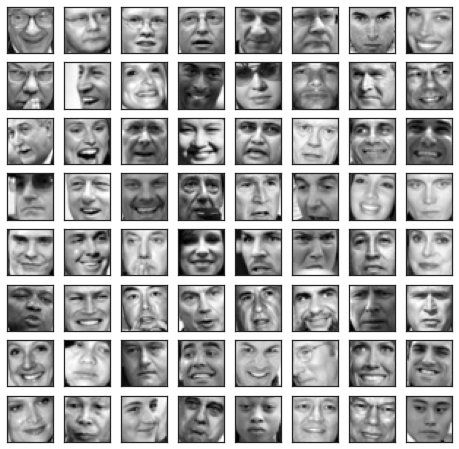

In [52]:
# support functions ---------------------------------------
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)),cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


plot_n_image(X, n=64)
plt.show()

## run PCA, find principle components

In [53]:
U, _, _ = pca(X)

In [54]:
U.shape

(1024, 1024)

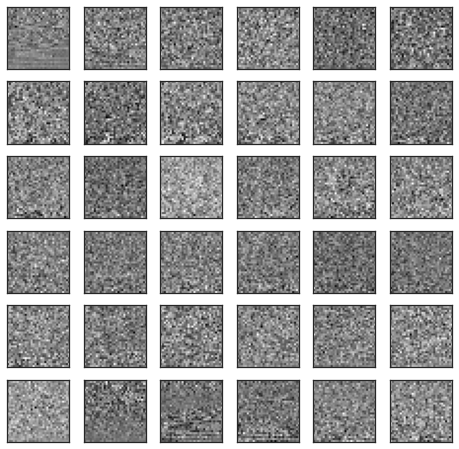

In [55]:
# didn't see face in principle components 
plot_n_image(U, n=36)
plt.show()

## reduce dimension to k=100

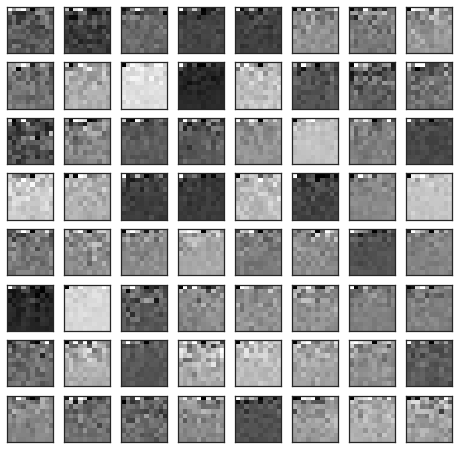

In [56]:
# no face in projected dimension too
Z = project_data(X, U, k=100)
plot_n_image(Z, n=64)
plt.show()

## recover from k=100

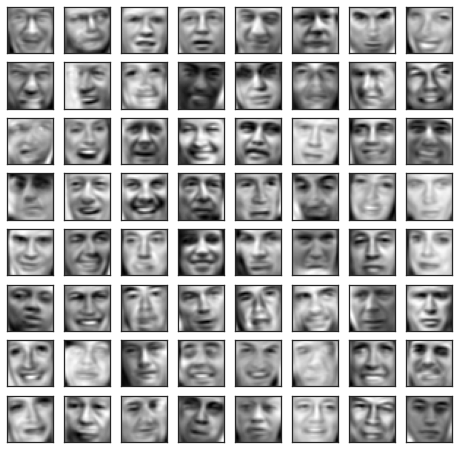

In [57]:
X_recover = recover_data(Z, U)
plot_n_image(X_recover, n=64)
plt.show()

## sklearn PCA

In [58]:
from sklearn.decomposition import  PCA

In [59]:
sk_pca = PCA(n_components=100)

In [60]:
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

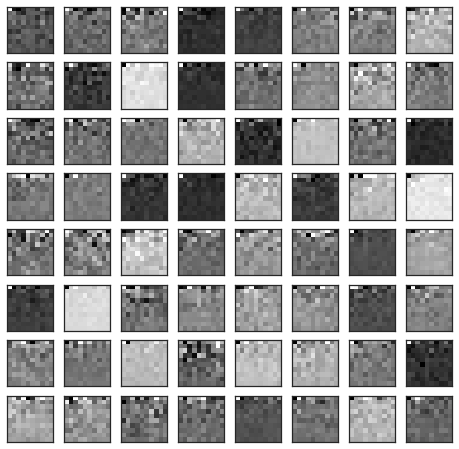

In [61]:
plot_n_image(Z,64)

In [62]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

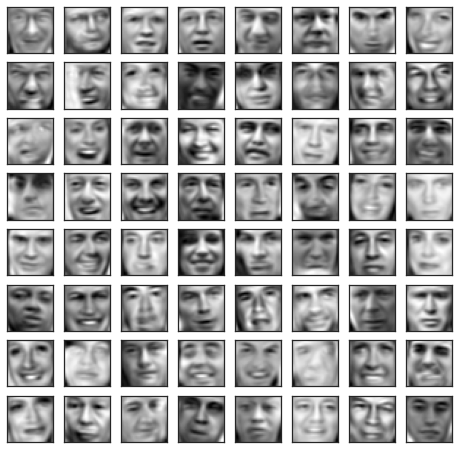

In [63]:
plot_n_image(X_recover, n=64)
plt.show()

# END